## E-commerce A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Assessment & Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

For this project, the mail goal will be to understand the results of an A/B test run by an e-commerce website.

<a id='probability'></a>
#### Part I - Assessment & Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

`1.` Now, let's read in the `ab_data.csv` data. Store it in `df`.

a. Reading in the dataset and looking at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Viewing general info about the data including the count of rows.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

Before calculating the proportion of users who converted, let us have a look at the duplicate users to see if maybe some of them converted more than 1 time.

In [5]:
df[df.user_id.duplicated(False)].sort_values(by='user_id')

,user_id,timestamp,group,landing_page,converted
230259,630052,2017-01-17 01:16:05.208766,treatment,new_page,0
213114,630052,2017-01-07 12:25:54.089486,treatment,old_page,1
22513,630126,2017-01-14 13:35:54.778695,treatment,old_page,0
251762,630126,2017-01-19 17:16:00.280440,treatment,new_page,0
183371,630137,2017-01-20 02:08:49.893878,control,old_page,0
...,...,...,...,...,...
142354,945703,2017-01-08 19:40:51.169351,control,new_page,0
186960,945797,2017-01-13 17:23:21.750962,control,old_page,0
40370,945797,2017-01-11 03:04:49.433736,control,new_page,1
165143,945971,2017-01-16 10:09:18.383183,control,old_page,0


In [6]:
conv_per_user = df.groupby(['user_id'], as_index=False).sum()
conv_per_user.query('converted > 1')

,user_id,converted
4453,634881,2
7004,637639,2
8812,639635,2
11805,642866,2
25378,657619,2
...,...,...
262288,915280,2
264754,917949,2
283150,937901,2
287973,943137,2


In [7]:
conv_per_user['converted'].value_counts(True)

0    0.878958
1    0.120822
2    0.000220
Name: converted, dtype: float64

**Note**

As it turns out, a small percentage of users, that is 0.02%, converted a couple of times. Rather than just calculating the converted portion by getting the mean of the **converted** column ```df.converted.mean()``` or using the sum of this column and divide it by the number of users ```df.converted.sum() / df.user_id.nunique()```, it would be best to sum the normalized value counts of those who either converted more than 0 times using ```1 - conv_per_user['converted'].value_counts(True)[0]``` 

In [8]:
1 - conv_per_user['converted'].value_counts(True)[0]

0.12104245244060241

e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
control_new = df.query('group == "control"')['landing_page'].value_counts()['new_page']
treatment_old = df.query('group == "treatment"')['landing_page'].value_counts()['old_page']

In [10]:
control_new + treatment_old

3893

f. Do any of the rows have missing values or duplicates?

In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [12]:
df.duplicated().sum()

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page. So it might be better to drop them in this case.

In [13]:
df2 = df.drop(df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page'))].index)

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.`

a. How many unique **user_id**s are in **df2**?

In [15]:
df2.user_id.nunique()

290584

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


b. There is one **user_id** repeated in **df2**. 

In [17]:
df2[df2.user_id.duplicated(False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. Removing **one** of the rows with a duplicate **user_id**.

In [18]:
df2.drop_duplicates(subset='user_id', inplace=True, ignore_index=True)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


`4.`

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [21]:
p_control = df2.group.value_counts(True)['control']
p_treatment = df2.group.value_counts(True)['treatment']
df2.group.value_counts(True)

treatment    0.500062
control      0.499938
Name: group, dtype: float64

In [22]:
conv_control = df2.query('group == "control"')['converted'].value_counts(True)[1]
noconv_control = df2.query('group == "control"')['converted'].value_counts(True)[0]
conv_treatment = df2.query('group == "treatment"')['converted'].value_counts(True)[1]
noconv_treatment = df2.query('group == "treatment"')['converted'].value_counts(True)[0]

In [23]:
conv_total = (p_control * conv_control) + (p_treatment * conv_treatment)
conv_total

0.11959708724499629

In [24]:
df2.converted.value_counts(True)[1]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [25]:
conv_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
conv_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [27]:
p_treatment

0.5000619442226688

**Conclusion**

From the above conditional probabilities, it looks like the old control page has a slightly higher probability of conversion. This suggests that we do not have enough evidence to opt for the new treatment page.

<a id='ab_test'></a>
### Part II - A/B Test

`1.` Assuming that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should the null and alternative hypotheses be?


$$H_0: P_{new}-P_{old}\leq0$$
$$H_1: P_{new}-P_{old}\gt0$$

`2.` Or option 2, assuming under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br>

Using a sample size for each page equal to the ones in **ab_data.csv**. Let's perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [28]:
p_new = conv_total
p_new

0.11959708724499629

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [29]:
p_old = conv_total
p_old

0.11959708724499629

c. What is $n_{new}$?

In [30]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [31]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulating $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.

In [32]:
new_page_converted = np.random.choice([0, 1], n_new, replace=True, p=[1-conv_total, conv_total])

f. Simulating $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.

In [33]:
old_page_converted = np.random.choice([0, 1], n_old, replace=True, p=[1-conv_total, conv_total])

g. Finding $p_{new}$ - $p_{old}$ under the simulated values from part (e) and (f).

In [34]:
new_page_converted.mean() - old_page_converted.mean()

-0.0016058925381856881

h. Simulating a bootstrap of 10,000 iterations $p_{new}$ - $p_{old}$ values using the same process calculated in parts **a. through g.** above.

In [35]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], n_new, replace=True, p=[1-conv_total, conv_total])
    old_page_converted = np.random.choice([0, 1], n_old, replace=True, p=[1-conv_total, conv_total])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

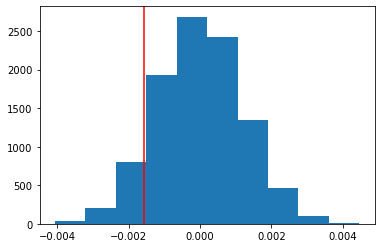

In [36]:
obs_diff = conv_treatment - conv_control
plt.hist(p_diffs)
plt.axvline(obs_diff, c='r');

**Conclusion**

As expected the simulations resulted in a normal distribution around zero, meaning that both control and treatment had the same conversion in support of the null hypothesis. When plotting the observed difference, it is clear that the treatment page had a slightly lower conversion as supported by the probabilities calculated before. Let us proceed with the p-values to arrive at more concrete results.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
#if the null hypothesis is less than or equal
p_val = (p_diffs > obs_diff).mean()
p_val

0.907

In [38]:
#if the null hyothesis is just equal
p_val_equal = (p_diffs < obs_diff).mean() + (p_diffs > (0-obs_diff)).mean()
p_val_equal

0.1874

**Conclusion**

The p-value indicates how likely it is that the population parameter is genetrated from the null hypothesis using a simulated normal distribution under the null. For the null hypothesis that the treatment group is associated with less or equal conversions, the p-value is 90.7% which means we do not have enough evidence to reject the null hypothesis. This in turn means that the website should stick with the old page.

For the null hypothesis where both pages have the same conversion, which is to say that the alternative hypothesis is that there is a difference in either direction, the p-value is 18.7%. Given a type I error rate of 5%, we do not have enough evidence to reject the null hypothesis. In conclusion, under both hypotheses, the company should opt of the old page which either has a similar or even higher conversion rate than the treatment page.

Seeing the the p-value for the null hypothesis of the control page conversion being greater or equal is much more statistically significant in this case, it seems that the old_page is not only equal but there is actually a good chance that it is in fact better associated with users converting. 

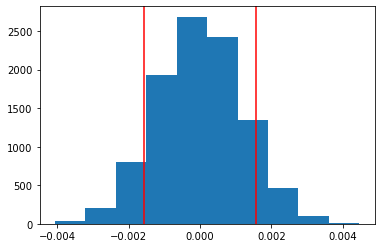

In [39]:
#to better capture the p-value visually
plt.hist(p_diffs)
plt.axvline(obs_diff, c='r')
plt.axvline(0-obs_diff, c='r');

l. We could also use a built-in to achieve similar results using `stats.proportions_ztest`.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance.

In [40]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
#already defined n_old =
#already defined n_new = 

**Note**
I referred to the following documentation and references.

https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

https://stats.stackexchange.com/questions/329465/assessing-a-b-test-results-using-python

https://stackoverflow.com/questions/53148935/one-sample-test-for-proportion

In [41]:
#for the null with less than or equal
sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], value=0, alternative='larger')

(-1.3109241984234394, 0.9050583127590245)

In [42]:
#for the null with just equal
sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], value=0, alternative='two-sided')

(-1.3109241984234394, 0.18988337448195103)

**Conclusion**

With a z-score of -1.3, it means that the conversions rate for the treatment is lower than old page by 1.3 standard deviations. For the p-value with the alternative hypothesis indicating a larger conversion for the treatment page, we get 90.5% which is matching with the results from before suggesting that we do not have enough evidence to reject the null and so the old page should stay in place. For the p-value with the alternative hypothesis indicating a difference on whichever side, we get 18.99% which is again very similar to the results in part k. This also means there is not enough evidence to reject the null and so the new page should not be implemented; assuming a type I error of 5%.

<a id='regression'></a>
### Part III - A regression approach

`1.` The results acheived in the previous A/B test can also be acheived by performing regression.

Since each row is either a conversion or no conversion and the response variable being of categorical nature, we have to use logistic regression for this case.

The goal is to use **statsmodels** to fit the regression model to see if there is a significant difference in conversion based on which page a customer receives.  However, we first need to create a column for the intercept, and create a dummy variable column for which page each user received.

In [43]:
df2['intercept'] = 1
df2[['old_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [44]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:34:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [45]:
1/np.exp(-0.0150)

1.015113064615719

**Conclusion**

The regression model is of logistic type. The response variable is whether a user converts or not; which is categorical. The explanatory variable is whether a user receives the treatment page or not; which is also categorical. Also, the intercept here is suggesting a baseline that a user receives the control page. The dummy variable for that had to be dropped to maintain a full rank model. 


As for the results, for users who are shown the control page, it is 1.015 times more likely that they will convert as compared to those who receive the treatement page; keeping other variables constant. Additionally, for the regression coefficient of using the treatment page, the p-value is 19% suggesting, a close but not enough, statistical evidence that the treatment page is correlated with a different conversion than the control page. However, while applying a type I error of 5%, we still do not have enough statistical evidence to reject the null hypothesis.

**Making sense of regression and A/B test together**

$$H_0: \beta_{abpage} = 0$$
$$H_1: \beta_{abpage} \neq 0$$

The p-value associate with the ab_page coefficient is 0.19. The null hypothesis here indicates that the coefficient is not equal to zero meaning that there is a linear relation between users receiving the ab_page and converting. This is the same as saying that both P_new and P_old are equal as shown in the below null hypothesis. Moreover, having a p-value of 19% means that we generally do have some statistical evidence to reject the null hypothesis that $\beta_{abpage}$ is equal to zero. That said, sticking to our alpha of 5%, there is still not enough evidence to reject the null hypothesis.

$$H_0: P_{new}-P_{old}\leq0$$
$$H_1: P_{new}-P_{old}\gt0$$

`2.` Now, considering other things that might influence whether or not an individual converts. 

As mentioned above, the likelihood of a control page converting is only 1.015 times higher than the treatment page. This could only qualify as a subtle difference. This derives so little insight when trying to predict which users might convert. In order to improve our model, perhaps we could reasearch and try to gather data for other explanatory variables. Also, with a type I error of 5%, other research variables should have a lower p-value so we can have higher statistical significance to reject the null. 

Generally speaking, adding more variables could become problematic as it could result in multicollinearity which might hurt the model results. VIFs or other techniques should be accounted for along the way to ensure there is no multicollinearity in the model.

g. **Testing the effect of countries**

In [ ]:
#reading in the country csv and joining dataframes
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [47]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,old_page,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [48]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   country       290584 non-null  object
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
 5   intercept     290584 non-null  int64 
 6   old_page      290584 non-null  uint8 
 7   ab_page       290584 non-null  uint8 
dtypes: int64(2), object(4), uint8(2)
memory usage: 16.1+ MB


In [49]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [50]:
df_new[['country_CA', 'country_UK', 'country_US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,old_page,ab_page,country_CA,country_UK,country_US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [51]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'country_CA', 'country_UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Nov 2020   Pseudo R-squ.:               2.323e-05
Time:                        22:34:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_CA    -0.0408      0.027     -1.516      0.130      -0.093       0.012
country_UK     0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [52]:
1/np.exp(-0.0149), 1/np.exp(-0.0408), np.exp(0.0099)

(1.0150115583846535, 1.0416437559600236, 1.0099491671175422)

***Results of adding countries***

For country CA explanatory variable, we have an improved statistical significance of 13%. However, still the same p-value for the variable of users receiving ab_page. The same conclusion for ab_pages as before, users who receive the control page have 1.015 times higher chance of converting while holding other variables constant. For CA country variable, it seems that US users have a conversion chance that is 1.042 times higher in comparison to CA users; holding other variables constant. For UK users, however, they have 1.010 times higher chance of converting as compared to US users while keeping other variables constant.

Additionally, to ensure that multicollinearity does not get in the way of our model, the calculated variance inflation factors are all under 10.

In [53]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('converted ~ ab_page + country_CA + country_UK', df_new, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["explanatory"] = X.columns
vif

,VIF Factor,explanatory
0,2.428940,Intercept
1,1.000006,ab_page
2,1.017759,country_CA
3,1.017761,country_UK


***Let's also look at the interaction between page and country to see if there significant effects on conversion.***

In [54]:
df_new['ab_UK'] = df_new['ab_page'] * df_new['country_UK']
df_new['ab_CA'] = df_new['ab_page'] * df_new['country_CA']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,old_page,ab_page,country_CA,country_UK,country_US,ab_UK,ab_CA
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,1,0


In [55]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'country_CA', 'ab_CA', 'country_UK', 'ab_UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 03 Nov 2020   Pseudo R-squ.:               3.482e-05
Time:                        22:34:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
country_CA    -0.0175      0.038     -0.465      0.642      -0.091       0.056
ab_CA         -0.0469      0.054     -0.872      0.383      -0.152       0.059
country_UK    -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [56]:
np.exp(-0.0206), np.exp(-0.0175), np.exp(-0.0469), np.exp(-0.0057), np.exp(0.0314)

(0.9796107305032505,
 0.9826522356650732,
 0.9541828111007262,
 0.9943162141784332,
 1.0318981806179213)

***Results of adding interactions between country and page***

First thing to notice is that we have an improved statistical significance for the ab_page variable as compared to the models created before. Because interpreting interaction variables could become complex depending on the changed values, it is better to identify certain possibilities which could be explained and use a compound of the multiplicative exponentials to predict the likelihood of conversions as compared to the baseline.

When looking at CA users receiving the control page, it seems that US users have a 1.017 times higher likelihood of conversion. If the CA users receive the ab page instead, their chance of conversion would still be lower than US users using the control.

On the contrary, for the UK users, in the previous model, we can notice that they have a higher chance of conversion than US users. In this model, nonetheless, this claims is flipped in case they just receive the control page but stands true if they receive the ab page. Meaning that, for UK users receiving the control page, US users get a chance of conversion that is 1.0057 higher. IF a UK user receives the ab page, their chances become higher in conversions as compared to US useres receiving the old page.

Although such findings can be insightful to further purse an alternative hypothesis of rolling out the ab page for UK users only, interactions models' main purpose is to predict rather than interpret changing effects.

Again, VIFs are calculated to ensure there is no multicollinearity in the model.

In [57]:
ab_page_CA = 0.9796107305032505 * 0.9826522356650732 * 0.9541828111007262
1/ab_page_CA

1.0887170666983987

In [58]:
old_page_CA = 0.9826522356650732
1/old_page_CA

1.0176540221507617

In [59]:
ab_page_UK = 0.9796107305032505 * 0.9943162141784332 * 1.0318981806179213
ab_page_UK

1.005113027136717

In [60]:
old_page_UK = 0.9943162141784332
1/old_page_UK

1.0057162759095335

In [61]:
ab_page_US = 0.9796107305032505
1/ab_page_US

1.020813644503746

In [62]:
y, X = dmatrices('converted ~ ab_page + country_CA + ab_CA + country_UK + ab_UK', df_new, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["explanatory"] = X.columns
vif

,VIF Factor,explanatory
0,2.856817,Intercept
1,1.427098,ab_page
2,2.049235,country_CA
3,2.103521,ab_CA
4,2.030763,country_UK
5,2.366531,ab_UK
